In [14]:
!pip install pystan


!conda install -c conda-forge fbprophet

In [1]:
#!pip install fbprophet
import pandas as pd
import fbprophet
import numpy as np
from fbprophet import Prophet
import pandas_profiling
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('C:/Users/sergey.volkov/Desktop/YP/taxi.csv')

In [3]:
df.head()

datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32

In [4]:
profile = pandas_profiling.ProfileReport(df)


In [5]:
profile

In [6]:
import cufflinks as cf
import plotly.offline

In [9]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df.iplot()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df.tail()

datetime  num_orders
26491 2018-08-31 23:10:00          32
26492 2018-08-31 23:20:00          24
26493 2018-08-31 23:30:00          27
26494 2018-08-31 23:40:00          39
26495 2018-08-31 23:50:00          53

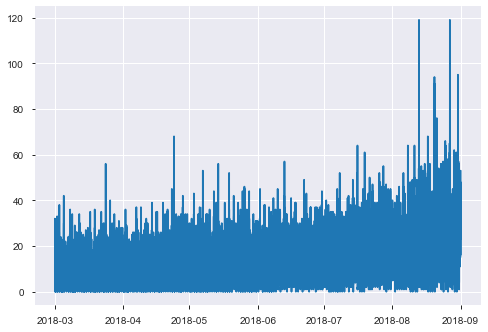

In [13]:
plt.plot(df['datetime'], df['num_orders']);
#df.plot(figsize=(12,5))

In [16]:
df.iplot()

In [8]:

df.rename(columns = {'datetime':'ds', 'num_orders':'y'}, inplace = True)
df

ds   y
0     2018-03-01 00:00:00   9
1     2018-03-01 00:10:00  14
2     2018-03-01 00:20:00  28
3     2018-03-01 00:30:00  20
4     2018-03-01 00:40:00  32
...                   ...  ..
26491 2018-08-31 23:10:00  32
26492 2018-08-31 23:20:00  24
26493 2018-08-31 23:30:00  27
26494 2018-08-31 23:40:00  39
26495 2018-08-31 23:50:00  53

[26496 rows x 2 columns]

In [9]:
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
df


ds   y
0     2018-03-01 00:00:00   9
1     2018-03-01 00:10:00  14
2     2018-03-01 00:20:00  28
3     2018-03-01 00:30:00  20
4     2018-03-01 00:40:00  32
...                   ...  ..
26491 2018-08-31 23:10:00  32
26492 2018-08-31 23:20:00  24
26493 2018-08-31 23:30:00  27
26494 2018-08-31 23:40:00  39
26495 2018-08-31 23:50:00  53

[26496 rows x 2 columns]

In [11]:
model =Prophet(yearly_seasonality = False,     weekly_seasonality = True,  seasonality_mode = 'multiplicative')


In [12]:

model.fit(df)


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [13]:

model.component_modes


{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['weekly',
  'daily',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [14]:
future = model.make_future_dataframe(periods = 31, freq = 'd')
forecast = model.predict(future)

C:\Users\sergey.volkov\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\sergey.volkov\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


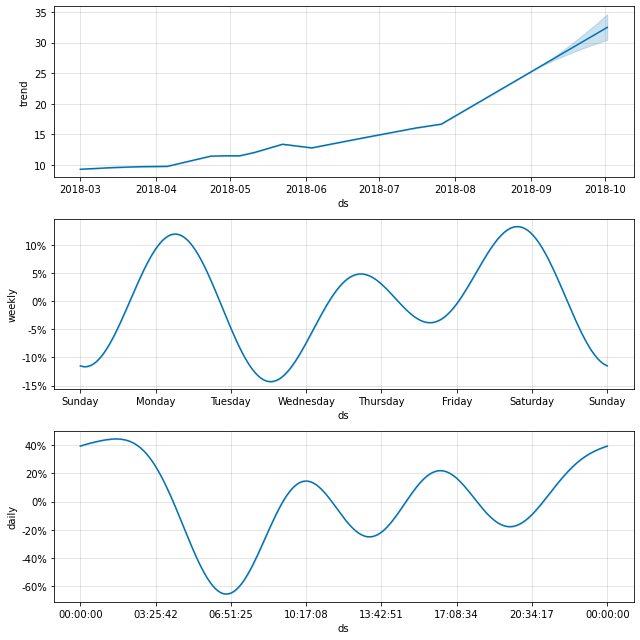

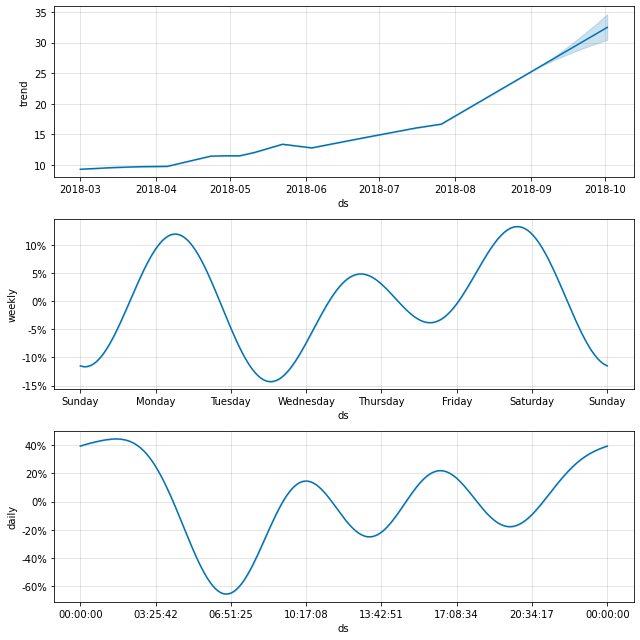

In [15]:
model.plot_components(forecast)

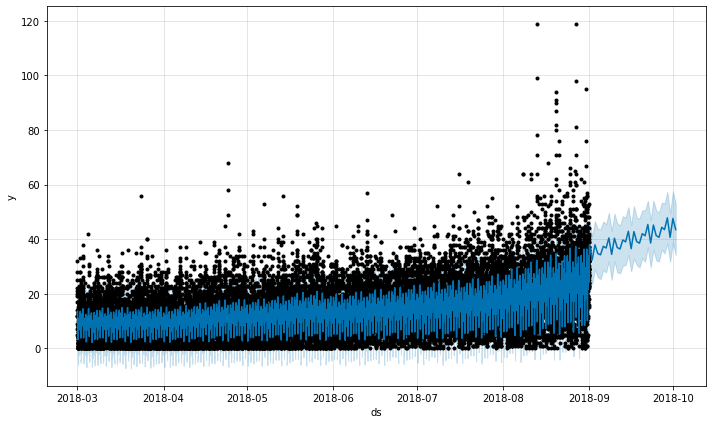

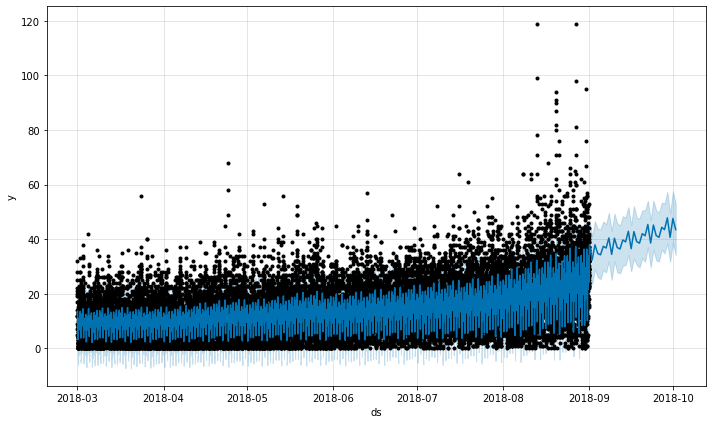

In [16]:
model.plot(forecast)

In [17]:
from fbprophet.diagnostics import cross_validation

In [18]:
df_cv = cross_validation(model, initial = '40 days', period = '90 days', horizon = '90 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-06-02 23:50:00 and 2018-06-02 23:50:00


  0%|          | 0/1 [00:00<?, ?it/s]

ds       yhat  yhat_lower  yhat_upper   y  \
0 2018-06-03 00:00:00  17.678147   10.818167   25.177323  13   
1 2018-06-03 00:10:00  17.642840   10.243064   25.367512  10   
2 2018-06-03 00:20:00  17.594961   10.296957   25.013720  18   
3 2018-06-03 00:30:00  17.536043   10.415619   25.117613  21   
4 2018-06-03 00:40:00  17.466751   10.522346   24.535702  22   

               cutoff  
0 2018-06-02 23:50:00  
1 2018-06-02 23:50:00  
2 2018-06-02 23:50:00  
3 2018-06-02 23:50:00  
4 2018-06-02 23:50:00

In [24]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon        mse      rmse       mae     mdape  coverage
0 9 days 00:00:00  39.756022  6.305238  4.980606  0.351594  0.775463
1 9 days 00:10:00  39.739733  6.303946  4.977675  0.351229  0.775463
2 9 days 00:20:00  39.694688  6.300372  4.971923  0.351017  0.776235
3 9 days 00:30:00  39.715986  6.302062  4.975677  0.351017  0.776235
4 9 days 00:40:00  39.774361  6.306692  4.980228  0.351017  0.775463

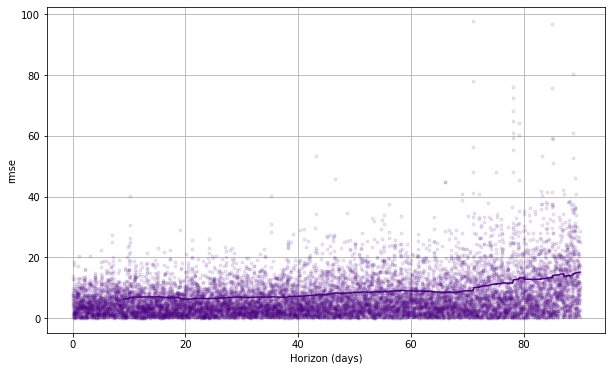

In [25]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse', color = 'indigo')



In [26]:
display(df_p.mean())

horizon     49 days 12:00:00
mse                81.692338
rmse                8.728211
mae                 6.473597
mdape               0.331263
coverage            0.786977
dtype: object